In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1. 들어가기에 앞서

In [37]:
X = [[0.10,1.00],
     [0.15,0.20],
     [0.48,0.60],
     [0.10,0.60],
     [0.20,0.15],
     [0.50,0.55],
     [0.20,1.00],
     [0.30,0.25],
     [0.52,0.60],
     [0.30,0.60],
     [0.40,0.20],
     [0.52,0.50]]
y = [1,2,3,1,2,3,1,2,3,1,2,3]
X = np.array(X)
y = np.array(y)

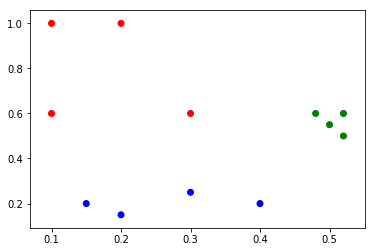

In [38]:
# Method 1
colors = {1:'red',2:'blue',3:'green'}
plt.scatter(X[:,0], X[:,1], c=list(map(lambda x:colors[x], y)))
plt.show()

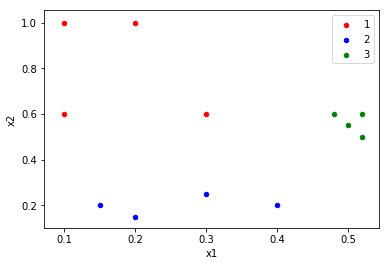

In [39]:
# Method 2
fig, ax = plt.subplots()
colors = {1:'red',2:'blue',3:'green'}
df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], color=y))
grouped = df.groupby('color')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])

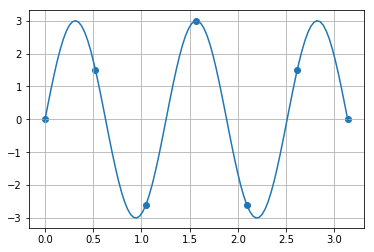

In [44]:
# 회귀
x = [0,0.5236,1.0472,1.5708,2.0944,2.6180,3.1416]
t = [0,1.5,-2.5981,3,-2.5981,1.5,0]

a = np.linspace(0,3.1416, 100)
b = 3*np.sin(5*a)

plt.scatter(x,t)
plt.plot(a,b)
plt.grid(True)
plt.show()

### 2. 들어가며

In [59]:
def Volume(n):
    if type(n) != int or n < 1:
        v = None    
    if n==1:
        v = 2
    elif n==2:
        v = np.pi
    else:
        v = 2*np.pi/n*V(n-2)    
    return v

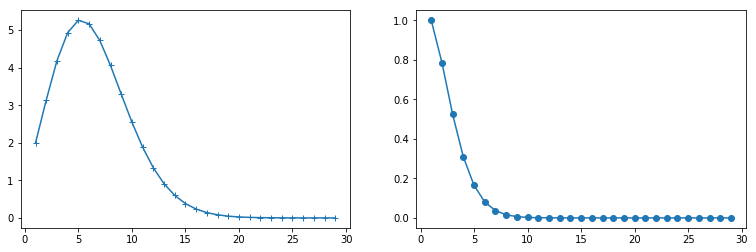

In [97]:
# 한 변의 길이가 2인 n차원 box에서 n차원 sphere가 차지하는 비중은 n이 커질수록 급격하게 줄어든다.
fig, ax = plt.subplots(1,2, figsize=(13,4))
x = np.arange(1,30)
y = np.array([Volume(n) for n in x])
z = np.array([2**n for n in x])

ax[0].plot(x,y,'-+')
ax[1].plot(x,y/z,'-o')
plt.show()

### 3. 퍼셉트론

In [68]:
#x = np.array([[0,0],[0,1],[1,0],[1,1]])
#t = np.array([0,1,1,1])


class nn:
    def __init__(self, eta, w):
        self.w = w
        self.eta = eta
    
    def __next(self, x, t):
        eta = self.eta
        w = self.w
        
        bias = -1
        x = np.array([bias]+list(x))
        y = 1 if np.sum(w*x)>0 else 0
        wp = w-eta*(y-t)*x
        return wp
    
    def update(self, x, t):
        self.w = self.__next(x, t)
        return None

In [90]:
np.random.seed(20180708)
eta = 0.25
#w = np.array([-0.05,-0.02,0.02])
w = np.random.normal(size=3)
neuron = nn(eta, w)

x = np.array([[0,0],[0,1],[1,0],[1,1]])
t = np.array([0,1,1,1])

for _ in range(10):
    for xin, tin in zip(x,t):
        neuron.update(xin,tin)
        print(neuron.w)

[ 0.42599274 -0.61734805  0.95818718]
[ 0.42599274 -0.61734805  0.95818718]
[ 0.17599274 -0.36734805  0.95818718]
[ 0.17599274 -0.36734805  0.95818718]
[ 0.17599274 -0.36734805  0.95818718]
[ 0.17599274 -0.36734805  0.95818718]
[-0.07400726 -0.11734805  0.95818718]
[-0.07400726 -0.11734805  0.95818718]
[ 0.17599274 -0.11734805  0.95818718]
[ 0.17599274 -0.11734805  0.95818718]
[-0.07400726  0.13265195  0.95818718]
[-0.07400726  0.13265195  0.95818718]
[0.17599274 0.13265195 0.95818718]
[0.17599274 0.13265195 0.95818718]
[-0.07400726  0.38265195  0.95818718]
[-0.07400726  0.38265195  0.95818718]
[0.17599274 0.38265195 0.95818718]
[0.17599274 0.38265195 0.95818718]
[0.17599274 0.38265195 0.95818718]
[0.17599274 0.38265195 0.95818718]
[0.17599274 0.38265195 0.95818718]
[0.17599274 0.38265195 0.95818718]
[0.17599274 0.38265195 0.95818718]
[0.17599274 0.38265195 0.95818718]
[0.17599274 0.38265195 0.95818718]
[0.17599274 0.38265195 0.95818718]
[0.17599274 0.38265195 0.95818718]
[0.17599274 0